In [3]:
!gcloud config set project etsy-bigquery-adhoc-prod


If you have a compatible Python interpreter installed, you can use it by setting
the CLOUDSDK_PYTHON environment variable to point to it.

Updated property [core/project].


In [4]:
%load_ext google.cloud.bigquery

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

In [6]:
%%bigquery df
select 
    `key` as query_str,
    queryLevelMetrics_bin as query_bin,
    queryTaxoDemandFeatures_purchaseTopTaxonomyPaths,
    queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths
from `etsy-ml-systems-prod.feature_bank_v2.query_feature_bank_2023-10-01`
where queryTaxoDemandFeatures_purchaseTopTaxonomyPaths is not null
and queryTaxoDemandFeatures_purchaseTopTaxonomyPaths.list[0] is not null

Downloading: 100%|██████████████| 4861275/4861275 [00:08<00:00, 573556.78rows/s]


In [7]:
df.head()

,query_str,query_bin,queryTaxoDemandFeatures_purchaseTopTaxonomyPaths,queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths
0,fruit of the loom ringer briefs small,None,{'list': [{'element': 'clothing'}]},{'list': [{'element': 'clothing.mens_clothing'}]}
1,fruit of the spirit craft,None,"{'list': [{'element': 'toys_and_games'}, {'ele...","{'list': [{'element': 'toys_and_games.toys'}, ..."
2,fruit of the spirit colouring page,None,{'list': [{'element': 'art_and_collectibles'}]},{'list': [{'element': 'art_and_collectibles.dr...
3,plantain herb salve,head,{'list': [{'element': 'bath_and_beauty'}]},{'list': [{'element': 'bath_and_beauty.skin_ca...
4,plantain cream,head,{'list': [{'element': 'bath_and_beauty'}]},{'list': [{'element': 'bath_and_beauty.skin_ca...


In [8]:
df["n_top_paths"] = df.queryTaxoDemandFeatures_purchaseTopTaxonomyPaths.apply(lambda x: len(x["list"]))
df["n_level2_paths"] = df.queryTaxoDemandFeatures_purchaseLevel2TaxonomyPaths.apply(lambda x: len(x["list"]))

In [17]:
n_top_max = df.n_top_paths.max()

In [18]:
n_level2_max = df.n_level2_paths.max()

In [32]:
bins = list(range(1, n_top_max + 1))
hist_values = df.n_top_paths.value_counts()[bins]

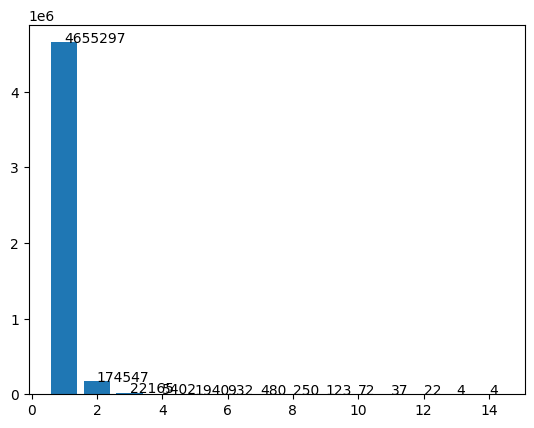

In [35]:
# bins = [1, 2, 3, 4, 5, 6, 10, 20, 50, 100]
# bin_labels = ["2", "3", "4", "5", "6-10", "10-20", "20-50", "50-100"]

bin_labels = [str(x) for x in bins]

percentage = ["{0:.0%}".format(x) for x in np.round(hist_values / df.shape[0], 5)]

ax = plt.bar(x=bins, height=hist_values.values)
for x, y, p in zip(bins, hist_values.values, hist_values.values):
    plt.text(x, y, p)

plt.show()

In [37]:
df.n_level2_paths.value_counts()

1     4568585
2      218252
3       45663
4       15142
5        5841
6        2711
7        1500
8         938
9         601
10        451
11        372
12        228
13        192
14        128
15        115
16         95
17         93
19         56
18         51
20         48
22         36
21         35
23         22
24         21
25         14
26         13
28         11
27          9
29          7
32          6
50          4
33          4
39          3
34          3
31          3
35          3
42          3
37          3
30          2
47          2
38          2
36          2
49          2
48          1
46          1
43          1
Name: n_level2_paths, dtype: int64

In [ ]:
bins = list(range(1, 41))
hist_values = df.n_level2_paths.value_counts()[bins]
bin_labels = [str(x) for x in bins]

In [42]:
df[df.n_level2_paths >= 40].shape

(14, 6)

In [46]:
bins = list(range(1, 40))
hist_values = df.n_level2_paths.value_counts()[bins]
bins.append(40)
hist_values = list(hist_values.values)
hist_values.append(40)

ax = plt.bar(x=bins, height=hist_values.values)
for x, y, p in zip(bins, hist_values.values, hist_values.values):
    plt.text(x, y, p)

plt.show()

AttributeError: 'list' object has no attribute 'values'